<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Intervalos_de_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crear intervalos de confianza.**

**Utilizando la distribución t de Student.**

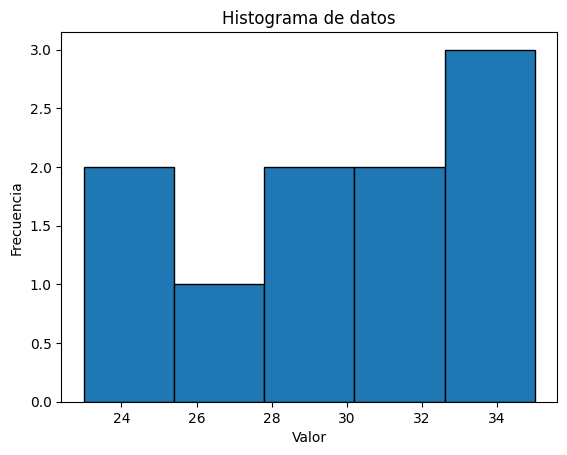

Prueba de normalidad Shapiro-Wilk:
Estadístico: 0.963787317276001
Valor p: 0.8280401825904846
Media Ventas:
29.7
El intervalo de confianza al 95% para la variable MoSold es:
(27.363611123077675, 32.036388876922324)


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos de ejemplo para MoSold
ventas = np.array([23, 25, 27, 28, 29, 31, 32, 33, 34, 35])

# Histograma
plt.hist(ventas, bins=5, edgecolor='black')
plt.title('Histograma de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(ventas)
print('Prueba de normalidad Shapiro-Wilk:')
print('Estadístico:', shapiro_stat)
print('Valor p:', shapiro_p_value)


# Calculamos la media de MoSold
ventas_mean = ventas.mean()
print('Media Ventas:')
print(ventas_mean)

# Calculamos el error estándar de la media
estimated_error = ventas.std() / np.sqrt(len(ventas))

# Construimos el intervalo de confianza utilizando la distribución normal
intervalo_confianza = stats.norm.interval(0.95, loc=ventas_mean, scale=estimated_error)
print('El intervalo de confianza al 95% para la variable MoSold es:')
print(intervalo_confianza)

En esta prueba, la hipótesis nula (H0) es que los datos siguen una distribución normal. Si el valor p asociado con la prueba es menor que un umbral predeterminado (comúnmente 0.05), entonces rechazamos la hipótesis nula y concluimos que los datos no siguen una distribución normal.

En tu caso, el estadístico de la prueba de Shapiro-Wilk es 0.9637 y el valor p es 0.8280. Dado que el valor p es mayor que el umbral comúnmente utilizado de 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, basado en esta prueba, no hay suficiente evidencia para concluir que los datos no siguen una distribución normal.

Exactamente, en muchos casos un enfoque básico como calcular el intervalo de confianza para la media utilizando la distribución normal es suficiente y proporciona una estimación razonable de la incertidumbre asociada con la estimación de la media.

Sin embargo, si deseas realizar pronósticos más avanzados y tener en cuenta la tendencia, la estacionalidad u otros patrones en tus datos, entonces podrías considerar técnicas más sofisticadas como el suavizado exponencial simple o modelos de series temporales.

**Utilizando la distribución normal estándar (z)**

In [ ]:
import numpy as np
from scipy import stats

# Datos de ejemplo para MoSold
sampled_data = np.array([23, 25, 27, 28, 29, 31, 32, 33, 34, 35])

# Calculamos la media de MoSold
sampled_mean = sampled_data.mean()

# Calculamos el error estándar de la media
estimated_error = sampled_data.std() / np.sqrt(len(sampled_data))

# Construimos el intervalo de confianza utilizando la distribución normal estándar (z)
intervalo_confianza_z = stats.norm.interval(0.95, loc=sampled_mean, scale=estimated_error)
print('El intervalo de confianza al 95% para la variable MoSold utilizando la distribución normal estándar (z) es:')
print(intervalo_confianza_z)

# **2. Verificar la regla empírica.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Montando el drive para acceder a los archivos, ya que tengo los csv en mi Drive, esto no es necesario si ustedes tienen el archivo en su escritorio.

Mounted at /content/drive


In [ ]:
import pandas as pd
# Ruta del archivo CSV en Google Drive.
productos_csv = '/content/drive/My Drive/Colab Notebooks/Módulo 4/house.csv'

# Importando la data y transformandola a objeto Dataframe.
# En este poner el path correspondiente del archivo como parametro de pd.read_csv.
df_house = pd.read_csv(productos_csv)

In [ ]:
variables_a_eliminar = ['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'LotFrontage']

df_house_limpia = df_house.drop(variables_a_eliminar, axis=1)

In [ ]:
df_house_limpia.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-13-23209f5174ed>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_house_limpia.hist(ax=axes)


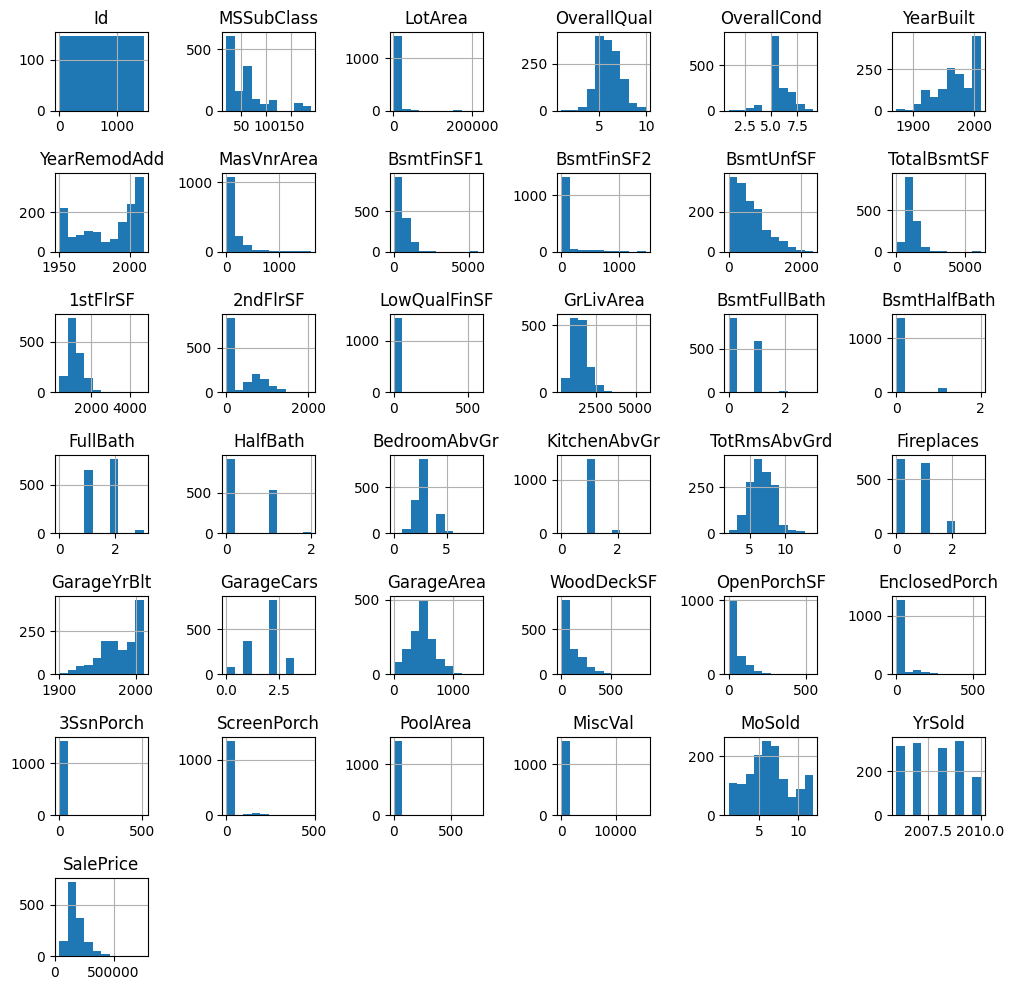

In [ ]:
# Lo primero para es graficar los datos mediante un histograma para identificar que variables pueden sugerir
# una distribución normal.

# Supongamos que df_house_limpia es tu DataFrame y contiene las columnas para los histogramas
fig, axes = plt.subplots(figsize=(12, 12))
df_house_limpia.hist(ax=axes)

# Ajusta la disposición manualmente
plt.subplots_adjust(hspace=0.8, wspace=0.8)  # Ajusta el espacio horizontal y vertical entre los subgráficos

# Muestra la figura
plt.show()

# Python muestra un mensaje de advertencia que dice que los subgráficos se superponen ligeramente debido a la configuración actual,
# pero como los gráficos se muestran correctamente y no hay ningún problema aparente, se continua sin problemas.


Según los histogramas podemos ver que algunas variables parecen seguir una distribución normal estas son:

MoSold
TotRmsAbvGrd
GarageArea
OverallQual
GrLivArea
2ndFlrSF
1stFlrSF
SalePrice
Por esta razón, vamos a realizar un remuestreo eligiendo la variable:

'MoSold' que representa el mes en que se vendió una casa.
Con la finalidad de identificar si sigue una distribución normal, pero de una forma técnica.

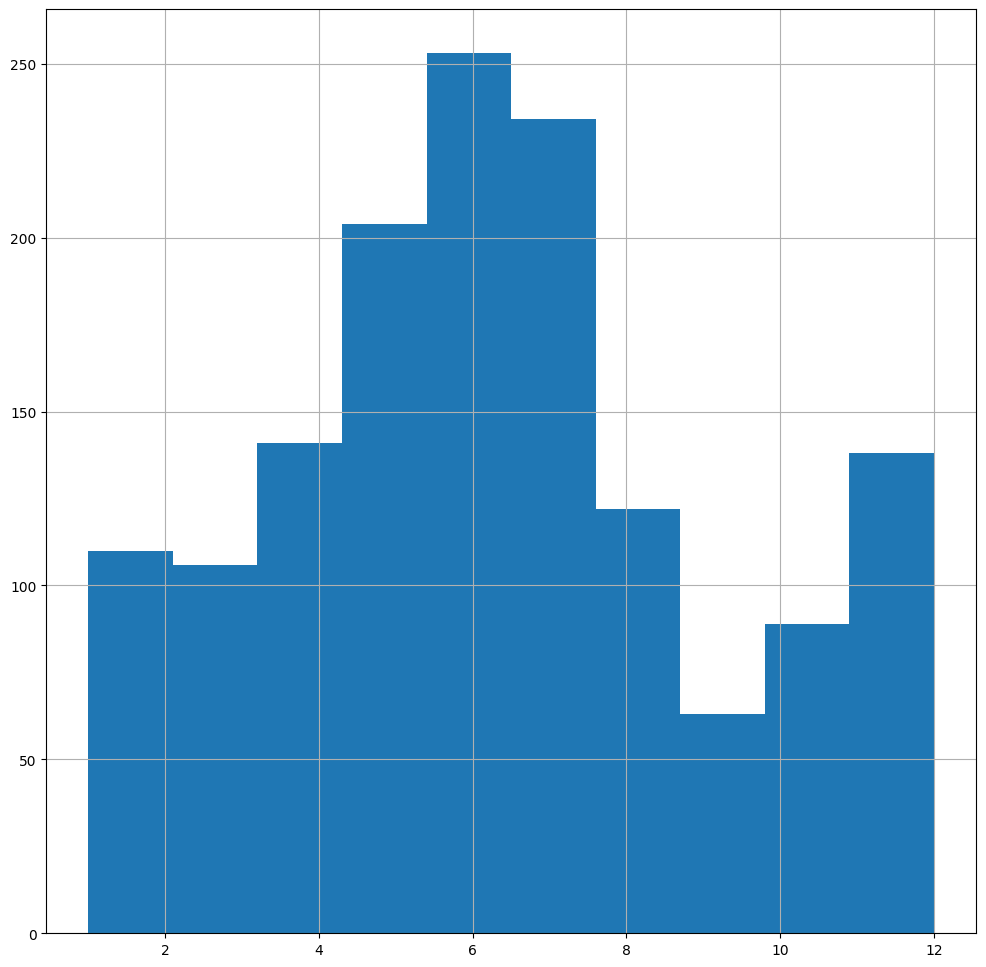

In [ ]:
# Remuestreo para calcular si la variable MoSold presenta una distribución normal.

MoSold = df_house_limpia['MoSold']
MoSold.hist(figsize=(12, 12))
plt.show()

In [ ]:
# Resumen estadístico de la variable MoSold.
MoSold.describe()

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

El histrograma parece mostrar una distribución normal dado que tiene una forma de campana, una media localizada en el centro de la curva con valor 6.32 y los costados simetrica a la media, pero aún no podemos dar por hecho que sea de este modo, por ello necesitamos realizar este procedimiento de una forma más técnica.

Para saber con exactitud si esta variable sigue una distribución normal es necesario evaluar bajo la regla empírica, la cual nos dice que:

Aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media.
Aproximadamente el 95% de los datos se encuentran dentro de dos desviaciones estándar de la media.
Aproximadamente el 99.7% de los datos se encuentran dentro de tres desviaciones estándar de la media.

In [ ]:
# Vamos a importar librerías que nos permitiran definir si esta variable sigue una distribución normal o no.

from scipy import stats
import statsmodels.api as sm

# Ahora vamos realizar los calculos necesarios para verificar la regla empírica.

# Necesitamos la Media y la Desviación Estándar.

# Calculo Media.
media_MoSold = MoSold.mean()
print(f'Media: {media_MoSold}')

# Calculo Desviación Estándar.
std_MoSold = MoSold.std()
print(f'Desviación estándar: {std_MoSold}')


Media: 6.321917808219178
Desviación estándar: 2.7036262083595126


Ahora para comprobar la regla empírica necesitamos calcular los intervalos de desviación estándar:

68% de los valores:

Media + 1 x desviación estándar: Aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media.

95% de los valores:

Media + 2 x desviación estándar: Aproximadamente el 95% de los datos se encuentran dentro de dos desviaciones estándar de la media.

99.7% de los valores:

Media + 3 x desviación estándar: Aproximadamente el 99.7% de los datos se encuentran dentro de tres desviaciones estándar de la media.

In [ ]:
# Sabiendo que la media es el punto medio de un rango de datos, podemos entender que
# existen datos sobre y por debajo de la media por ello vamos a calcular los limites
# superior +1 e inferiores -1 luego aplicaremos la fórmula anteriormente vista y
# verificaremos si sigue la regla empírica o no.

limite_superior = media_MoSold + 1 * std_MoSold
limite_inferior = media_MoSold - 1 * std_MoSold

((MoSold >= limite_inferior) & (MoSold <= limite_superior)).mean()*100

69.65753424657535

Podemos comprobar que el 69.65% de los valores caen dentro de una desviación estándar.

In [ ]:
# Mismo procedimiento pero para 2 desviaciones estándar.

limite_superior = media_MoSold + 2 * std_MoSold
limite_inferior = media_MoSold - 2 * std_MoSold

((MoSold >= limite_inferior) & (MoSold <= limite_superior)).mean()*100

95.95890410958904

Podemos comprobar que el 95.96% de los valores caen dentro de una desviación estándar.

In [ ]:
# Mismo procedimiento pero para 3 desviaciones estándar.

limite_superior = media_MoSold + 3 * std_MoSold
limite_inferior = media_MoSold - 3 * std_MoSold

((MoSold >= limite_inferior) & (MoSold <= limite_superior)).mean()*100

100.0

Podemos comprobar que el 100% de los valores caen dentro de una desviación estándar.

Ahora siguiendo la regla empírica tenemos que:

Media + 1 x desviación estándar:

Regla empírica: 68%
Variable MoSold: 69.66%

Media + 2 x desviación estándar:

Regla empírica: 95%
Variable MoSold: 95.96%

Media + 3 x desviación estándar:

Regla empírica: 99.7%
Variable MoSold: 100.00%

En este punto es seguro decir que esta variable sigue una distribución normal, dado que hemos obtenido valores que siguen la regla empírica, obviamente no se espera que sean los mismos porcentajes, pero es claro que es acorde a este método.

# **3. Casos de transformación.**

**En caso de que los datos no sigan una distribución normal.**

In [ ]:
# Aplicar transformación logarítmica
ventas_log = np.log(ventas)

# Mostrar los datos transformados
print("Datos originales:", ventas)
print("Datos transformados (logarítmicos):", ventas_log)

Datos originales: [23 25 27 28 29 31 32 33 34 35]
Datos transformados (logarítmicos): [3.13549422 3.21887582 3.29583687 3.33220451 3.36729583 3.4339872
 3.4657359  3.49650756 3.52636052 3.55534806]


In [ ]:
# Prueba de normalidad Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(ventas_log)
print('Prueba de normalidad Shapiro-Wilk:')
print('Estadístico:', shapiro_stat)
print('Valor p:', shapiro_p_value)

Prueba de normalidad Shapiro-Wilk:
Estadístico: 0.9538734555244446
Valor p: 0.7143933176994324


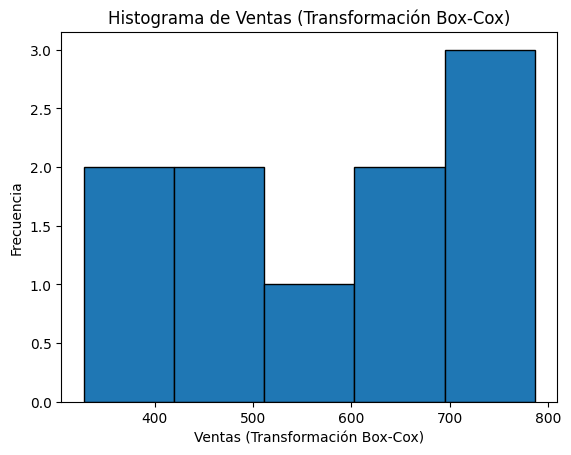

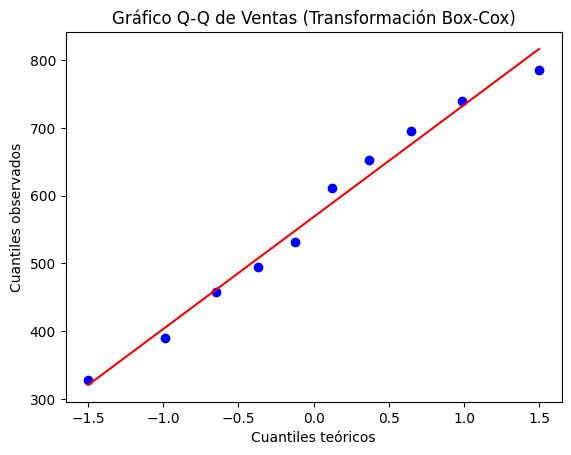

Valor de lambda en la transformación Box-Cox: 2.081738757277494


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos de ejemplo para ventas
ventas = np.array([23, 25, 27, 28, 29, 31, 32, 33, 34, 35])

# Aplicar transformación Box-Cox
ventas_boxcox, lambda_value = stats.boxcox(ventas)

# Histograma de los datos transformados
plt.hist(ventas_boxcox, bins=5, edgecolor='black')
plt.title('Histograma de Ventas (Transformación Box-Cox)')
plt.xlabel('Ventas (Transformación Box-Cox)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q de los datos transformados
stats.probplot(ventas_boxcox, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Ventas (Transformación Box-Cox)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()

# Imprimir el valor de lambda
print("Valor de lambda en la transformación Box-Cox:", lambda_value)